<a href="https://colab.research.google.com/github/VARA-2213/CODSOFT/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING THE LIBRARIES**

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Collection & Processing**

In [ ]:
# load the data from csv file

titanic_data=pd.read_csv("/content/drive/MyDrive/titanic survival prediction/tested.csv")

In [ ]:
# Print data

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
 # Total number of rows & Columns

titanic_data.shape

(418, 12)

In [ ]:
# Some informations about the data

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
# Missing value

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#Handling the missing values
# drop cabin table

titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [ ]:
#Replacing the missing values in "Age" column with mean value of age column

titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [ ]:
# Search the mode value of "Embarked" column

print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(titanic_data['Embarked'].mode()[0])

S


In [ ]:
#Replacing the missing values in "Embarked" column with mode values

titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [ ]:
#Replacing the missing values in "Embarked" column with mode values

titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [ ]:
#After filling missing values check again the number of missing values in each column

titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
#Getting some statistical information about the data

titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# **Data Analysis**

In [ ]:
#Getting some statistical information about the data

titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# **Data Visualization**

# **Countplot**

In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

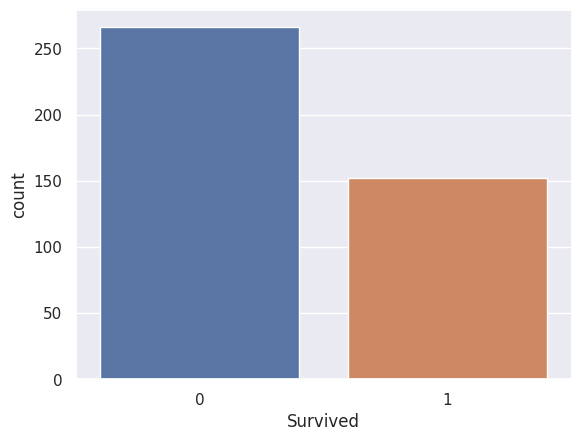

In [ ]:
#Making a count plot for "Survived" column

sns.countplot(x='Survived', data=titanic_data)

In [ ]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

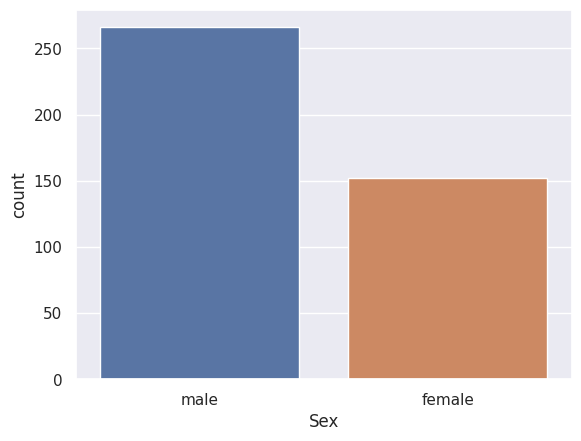

In [ ]:
#Making a count plot for "Sex" column

sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

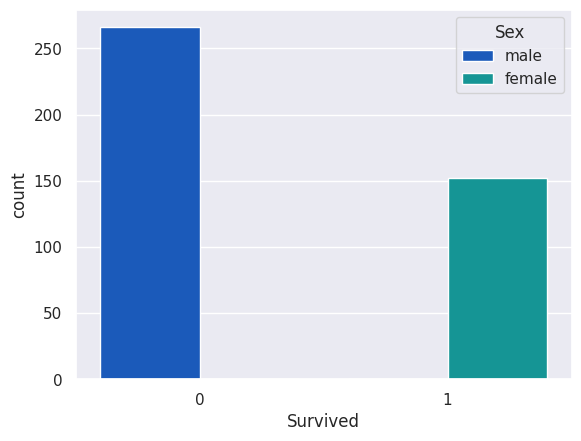

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data,palette='winter')

<Axes: xlabel='Sex', ylabel='count'>

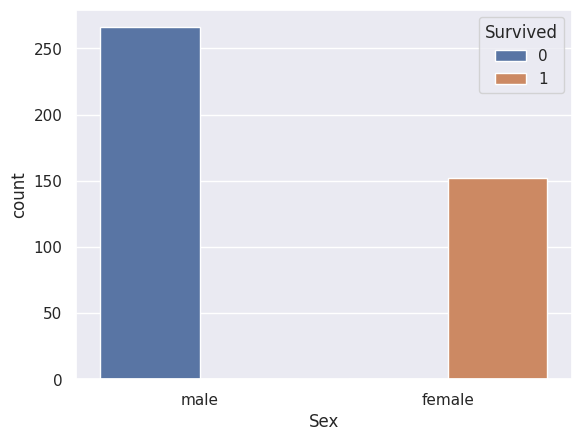

In [ ]:
#Number of survivors Gender wise

sns.countplot(x='Sex', hue='Survived',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

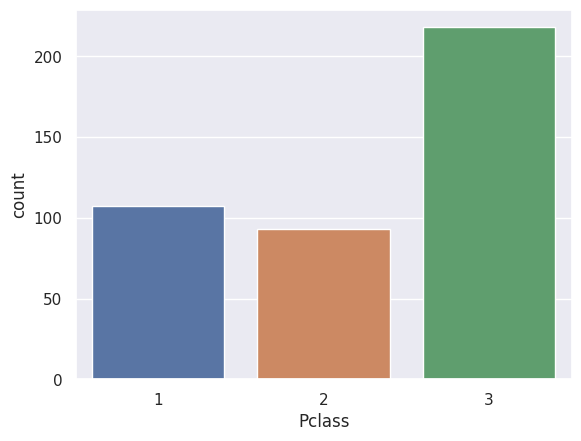

In [ ]:
# making a count plot for "Pclass" column

sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

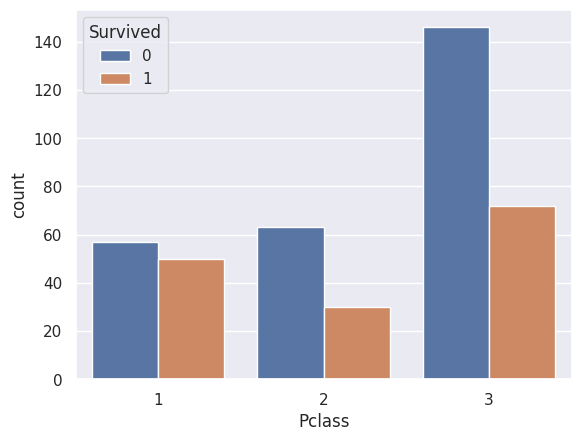

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

# **Pie Chart**

In [ ]:
titanic_data.groupby('Survived')['PassengerId'].count()

Survived
0    266
1    152
Name: PassengerId, dtype: int64

([<matplotlib.patches.Wedge at 0x7e371d76e620>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Not Survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

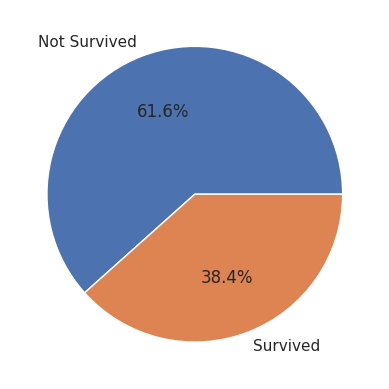

In [ ]:
values=(549,342)
labels=('Not Survived','Survived')
plt.pie(values,labels=labels,autopct='%2.1f%%')

# **Countplot**

<Axes: xlabel='Sex', ylabel='count'>

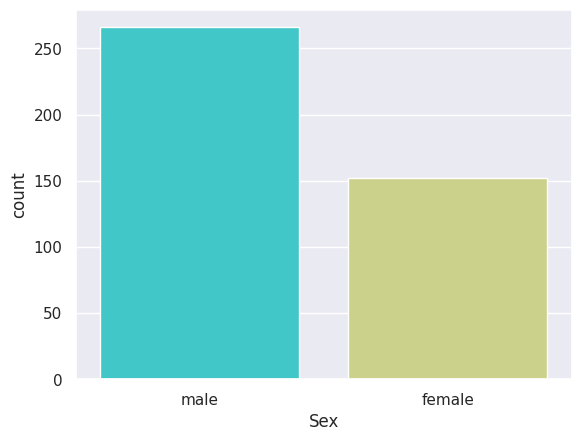

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Sex',data=titanic_data,palette='rainbow')

<Axes: xlabel='Sex', ylabel='count'>

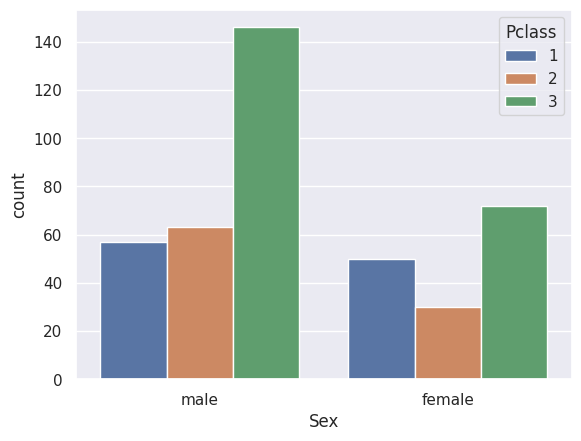

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Sex',data=titanic_data,hue='Pclass')

# **Pie Chart**

In [ ]:
titanic_data.groupby('Pclass')['Survived'].count()

Pclass
1    107
2     93
3    218
Name: Survived, dtype: int64

([<matplotlib.patches.Wedge at 0x7e371d6de320>,
 [Text(0.796107424686281, 0.7590869306998885, '1 class'),
  Text(-0.6221676201813418, 0.9071424653260843, '2 class'),
  Text(-0.175716065426671, -1.0858747001155198, '3 class')],
 [Text(0.43424041346524417, 0.41404741674539375, '24.2%'),
  Text(-0.33936415646254997, 0.49480498108695503, '20.7%'),
  Text(-0.09584512659636599, -0.5922952909721017, '55.1%')])

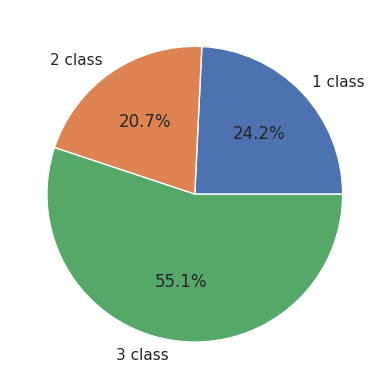

In [ ]:
values=(216,184,491)
labels=('1 class','2 class','3 class')
plt.pie(values,labels=labels,autopct='%2.1f%%')

# **Histogram**

<Axes: >

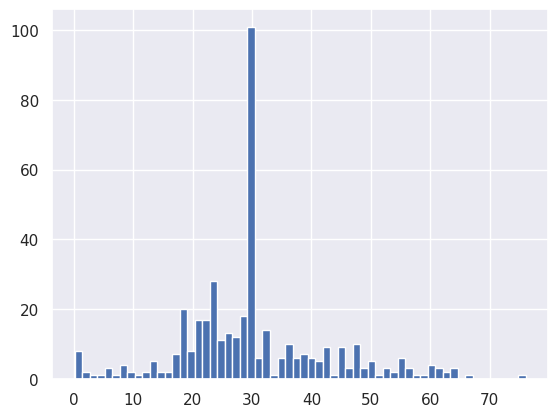

In [ ]:
titanic_data['Age'].hist(bins=60)

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


In [ ]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [ ]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

# **Heatmap**

<Axes: >

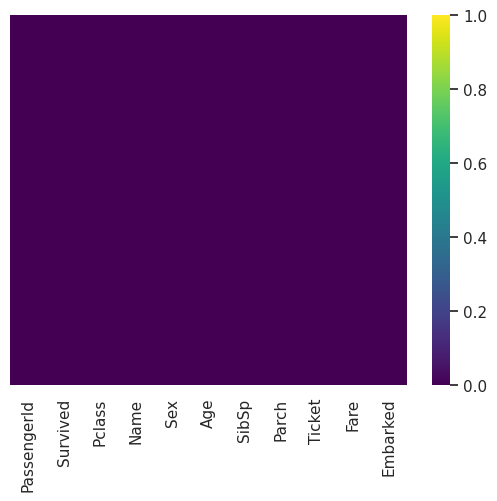

In [ ]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis',cbar='False')

In [ ]:
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
#Converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [ ]:
titanic_data = titanic_data.drop(columns=['Name', 'Ticket',], axis=1)
titanic_data.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,892,0,3,0,34.5,0,0,7.8292,2
1,1,893,1,3,1,47.0,1,0,7.0000,0
2,2,894,0,2,0,62.0,0,0,9.6875,2
3,3,895,0,3,0,27.0,0,0,8.6625,0
4,4,896,1,3,1,22.0,1,1,12.2875,0


In [ ]:
titanic_data['Age']=titanic_data['Age'].fillna(titanic_data['Age'].mean())

In [ ]:
titanic_data['Embarked'].mode()[0]

0

In [ ]:
titanic_data['Embarked']=titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

In [ ]:
titanic_data.isnull().sum()

index          0
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()
for col in cols:
  titanic_data[col] = le.fit_transform(titanic_data[col])
  titanic_data.head()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = titanic_data.drop(['Survived'],axis=1)
Y = titanic_data['Survived']

In [ ]:
print(X)

     index  PassengerId  Pclass  Sex       Age  SibSp  Parch      Fare  \
0        0          892       3    0  34.50000      0      0    7.8292   
1        1          893       3    1  47.00000      1      0    7.0000   
2        2          894       2    0  62.00000      0      0    9.6875   
3        3          895       3    0  27.00000      0      0    8.6625   
4        4          896       3    1  22.00000      1      1   12.2875   
..     ...          ...     ...  ...       ...    ...    ...       ...   
413    413         1305       3    0  30.27259      0      0    8.0500   
414    414         1306       1    1  39.00000      0      0  108.9000   
415    415         1307       3    0  38.50000      0      0    7.2500   
416    416         1308       3    0  30.27259      0      0    8.0500   
417    417         1309       3    0  30.27259      1      1   22.3583   

     Embarked  
0           2  
1           0  
2           2  
3           0  
4           0  
..        ...  

In [ ]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


# **Training and Prediction**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=101)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(418, 9) (334, 9) (84, 9)


In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [ ]:
log = LogisticRegression()

In [ ]:
#Training the Logistic Regression model with training data
log.fit(X_train, Y_train)

LogisticRegression()

### **In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.**
### **On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [ ]:
#making predictions on testing data
predictions = log.predict(X_test)


In [ ]:
X_train_prediction = log.predict(X_train)

In [ ]:
print(X_train_prediction)

[1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0
 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0
 0]


# **Evaluation**

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        37

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# **Making a .csv File of the Predictions**

In [ ]:
pred = log.predict(X)

In [ ]:
pred.shape

(418,)

In [ ]:
X.shape

(418, 9)

In [ ]:
submission =pd.DataFrame({
    'PassengerId' : X['PassengerId'],
    'Survived' : pred
})

In [ ]:
submission.head

<bound method NDFrame.head of      PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]>

In [ ]:
submission.to_csv('Titanic-Predictions.csv')

# **Accuracy Score**

In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [ ]:
X_test_prediction = log.predict(X_test)

In [ ]:
print(X_test_prediction)

[0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 1]


In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0
